In [103]:
prefix = '/home/ines/repositories/'
prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [106]:
import os
import numpy as np
import pickle
import pandas as pd
from scipy.stats import zscore
from brainbox.io.one import SessionLoader
from sklearn.preprocessing import StandardScaler
import gc
import concurrent.futures
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from functions import idxs_from_files
from one.api import ONE
one = ONE(mode='remote')

from functions import define_trial_types
functions_path =  prefix + 'representation_learning_variability/Models/Sub-trial//3_postprocess_results/'
os.chdir(functions_path)
from plotting_functions import create_grouped_gradient_palette
from postprocessing_functions import transition_probabilities

In [6]:
extra_sessions = ['2d7c0f7f-e805-404b-914a-23d83998e08e',
'7691eeb3-715b-4571-8fda-6bb57aab8253',
'a28746ff-a6e0-403d-a11d-893c2f9a44b4',
'f140a2ec-fd49-4814-994a-fe3476f14e66',
'bd8b204f-a42e-45c1-a8f0-71c6223a6657',
'e4fac833-d985-4bb2-a97a-c4d7ed8d06e1',
'13b70283-e8d3-4e69-ae3f-83f50c9602e2',
'e34ee0ad-3ad8-4faa-b4d5-c1cc0cf3b496',
'f3eeb2d4-87ce-49ae-8a74-21665f6f1536',
'd9f0c293-df4c-410a-846d-842e47c6b502',
'86f741b4-9dee-4c28-8ee9-49f3656ab419',
'650a0a90-4bf3-4489-9bcd-75baf0a49eac',
'a2be3311-de26-48b3-bfc7-317e94a4fdd3',
'12f95449-6914-4d76-9eb3-7d79757a4a77',
'd9907ac3-7378-471d-91fb-c8ec34870e17',
'b4a8ec28-46ad-4b6f-908b-650d0970a0db',
'c51f34d8-42f6-4c9c-bb5b-669fd9c42cd9',
'71963e7f-5947-4c3e-bcc8-dfdef3d71be7',
'7471a326-894d-4b55-8b01-a0ad56af209c',
'8839a67d-991a-4694-9c45-b3af73ce4d36',
'db4fe6df-b1d2-4958-9c93-e71696d58f7f',
'80653a5b-c7aa-479d-9ae0-c92f296fface',
'169c9a39-cb63-4b77-93e2-10e076d4c472',
'495bee7e-b58e-42ea-8481-4a1bfedca54a',
'1db57661-5ad3-4465-b9ee-08473af9c2e8',
'3513e7f2-d2e6-4411-8055-54dac50458f6',
'd035c5ba-d51e-49a9-a94b-23531a598ec3',
'6a369bfa-a70b-4147-af25-d03772ff8d96',
'7050ae29-a99e-43f1-aa42-b4416200351c',
'3fa080ff-bcce-43e8-bd5f-601f0591f785',
'369c3073-e886-4b28-a32b-a5860df21392',
'aa8c915b-cc12-4022-8339-3faa438d7fe2',
'8b422ab2-fc98-4d25-ac1f-e239ca869d9e',
'87d86bb0-72d3-4213-be72-392295d3d601',
'2ab80a04-96f6-45f8-bf69-7eac67f81742',
'57701dff-8107-4ab6-ac7a-b087a2e4cc94',
'42541dce-2ffb-452e-bf54-119aee2ae48a',
'89848cb4-77d3-4db2-877e-2fa73a3cf5f6',
'33cbe984-deb7-489c-add6-d98ac9f64df6',
'0b5f5111-5647-4400-8e08-f57975027b5e',
'9e77877d-6fcf-4e91-9337-4b19277561d5',
'dc36f1b9-5dba-49c4-b333-ad08af6b8f86',
'8a039e2b-637e-45ed-8da6-0641924626f0',
'00d3c9ea-2c91-44c2-b03e-6dfec5e08f27',
'e698b903-98ed-48b9-bc40-664274f722da',
'e5094e8a-cd54-43d4-8a7a-c5aa54b15e19',
'09137957-7216-40ea-90b5-ef85a62b578a',
'03f0ed7f-e647-4732-ae1a-d41fc459138b',
'4373de88-6b08-4185-a224-f898fd0017d4',
'30c4e2ab-dffc-499d-aae4-e51d6b3218c2',
'1e07df0b-205b-4c94-8e02-2ae07dae4347',
'5c7d2345-1f0e-40e5-aad7-2c6133b71b09',
'1735d2be-b388-411a-896a-60b01eaa1cfe',
'14736609-bfdd-4620-8e47-09d7f4bc4412',
'4537bd9a-0a63-4462-870c-5f6d70d289ed',
'1715d2bc-4da3-4de2-9631-3ab1c600f2bf',
'aed404ce-b3fb-454b-ac43-2f12198c9eaf',
'f115196e-8dfe-4d2a-8af3-8206d93c1729',
'5c454bcb-ae77-42da-a8d2-b6463ea9f21b',
'c728f6fd-58e2-448d-aefb-a72c637b604c',
'c8fc81e8-fd09-4228-a08c-81c01f21381a',
'7502ae93-7437-4bcd-9e14-d73b51193656',
'297bd519-78f8-45d2-af85-835e865e228f',
'7b074b1a-6576-4380-91e4-ad6cdf06c3a6',
'064a7252-8e10-4ad6-b3fd-7a88a2db5463']

In [7]:
sessions_to_exclude = ['2d7c0f7f-e805-404b-914a-23d83998e08e', # bad right cam
'7691eeb3-715b-4571-8fda-6bb57aab8253', # bad view of paws
'bd8b204f-a42e-45c1-a8f0-71c6223a6657', # bad right camera
'f3eeb2d4-87ce-49ae-8a74-21665f6f1536', # moving licks
'650a0a90-4bf3-4489-9bcd-75baf0a49eac', # licks fail
'495bee7e-b58e-42ea-8481-4a1bfedca54a', # timestamps
'1db57661-5ad3-4465-b9ee-08473af9c2e8', # timestamps
'6a369bfa-a70b-4147-af25-d03772ff8d96', # timestamps
'7050ae29-a99e-43f1-aa42-b4416200351c', # timestamps
'3fa080ff-bcce-43e8-bd5f-601f0591f785', # timestamps
'5c454bcb-ae77-42da-a8d2-b6463ea9f21b', # bad licks
'c728f6fd-58e2-448d-aefb-a72c637b604c' # no data can be loaded
]

In [8]:
sessions_to_process = [x for x in extra_sessions if x not in sessions_to_exclude]

In [11]:
# Loop through animals
data_path = prefix + 'representation_learning_variability/paper-individuality/data/design_matrices/extra_bwm/'
all_files = os.listdir(data_path)
design_matrices = [item for item in all_files if 'design_matrix' in item and 'standardized' not in item]
idxs, mouse_names = idxs_from_files(design_matrices)

wheel_k = 3
paw_k = 8

paw_wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_wavelets/extra_bwm/'
paw_states_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_most_likely_states/'

wheel_wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/wheel_wavelets/extra_bwm/'
wheel_states_path = prefix + 'representation_learning_variability/paper-individuality/data/wheel_most_likely_states/'

In [12]:
paw_fix_mapping = {0:4, 1:1, 2:5, 3:7, 4:6, 5:2, 6:0, 7:3}
# paw_fix_mapping = {0: 4,
#         1:0,
#         2:3,
#         3:1,
#         4:6,
#         5:7,
#         6:2,
#         7:5
#         }  # for z-scored t-SNE
wheel_fix_mapping = {0:1, 1:0, 2:2} 

paw_func = np.vectorize(paw_fix_mapping.get)
wheel_func = np.vectorize(wheel_fix_mapping.get)

In [16]:
all_sessions = pd.DataFrame()

for m, mat in enumerate(idxs):
    mouse_name = mat[37:]
    session = mat[:36]

    if session not in sessions_to_exclude:
        filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
        design_matrix = pd.read_parquet(filename)
        design_matrix['paw_states'] = design_matrix['Bin'] * np.nan
        design_matrix['wheel_states'] = design_matrix['Bin'] * np.nan

        array = np.array(design_matrix[['Bin', 'avg_wheel_vel']]) 
        not_nan_wheel = ~np.isnan(array).any(axis=1)
        # Load wheel states 
        states_filename = wheel_states_path + "most_likely_states_" + str(wheel_k) + '_'  + mouse_name + session + '.npy'
        wheel_most_likely_states = np.load(open(states_filename, "rb"))
        assert len(wheel_most_likely_states) == len(design_matrix[not_nan_wheel])
        design_matrix['wheel_states'][not_nan_wheel] = wheel_func(wheel_most_likely_states)

        array = np.array(design_matrix[['Bin', 'l_paw_x', 'l_paw_y', 'r_paw_x', 'r_paw_y']]) 
        not_nan_paw = ~np.isnan(array).any(axis=1)
        # Load paw states
        states_filename = paw_states_path + "most_likely_states_" + str(paw_k) + '_'  + mouse_name + session + '.npy'
        paw_file = np.load(open(states_filename, "rb"))
        paw_most_likely_states = paw_file[0]
        paw_bins = paw_file[1]
        
        design_matrix.loc[design_matrix['Bin'].isin(paw_bins), 'paw_states'] = paw_func(paw_most_likely_states)
        
        # try:
        #     assert len(paw_most_likely_states) == len(design_matrix[not_nan_paw])
        #     design_matrix['paw_states'][not_nan_paw] = paw_most_likely_states
        # except Exception:
        #     print(Exception)
        #     print(len(paw_most_likely_states))
        #     print(len(design_matrix[not_nan_paw]))

        design_matrix['mouse_name'] = mouse_name
        design_matrix['session'] = session

        # design_matrix['wheel_states'] = wheel_func(design_matrix['wheel_states'])
        # design_matrix['paw_states'] = paw_func(design_matrix['paw_states'])

        all_sessions = pd.concat([all_sessions, design_matrix])


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_12839/3909189036.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_func(wheel_most_likely_states)
/var/folders/nt/d2j3zp9d1xzb

In [4]:
# Load data
data_path = prefix + 'representation_learning_variability/paper-individuality/lightningAction/'
filename = "paw_states_24022026"
all_sessions = pd.read_parquet(data_path+filename)


# Pre-process

In [5]:
def add_most_likely_state(df, state_columns, new_column="left_paw_cameraL"):
    """
    df : pandas DataFrame
    state_columns : list of column names containing state probabilities
    new_column : name of output column
    """

    df[new_column] = df[state_columns].idxmax(axis=1)
    return df

In [19]:
var_left = ['leftCam_paw_r_still',  'leftCam_paw_r_move',  'leftCam_paw_r_wheel_turn',  'leftCam_paw_r_groom']
var_right = ['rightCam_paw_r_still',  'rightCam_paw_r_move',  'rightCam_paw_r_wheel_turn',  'rightCam_paw_r_groom']

new_df = add_most_likely_state(all_sessions, var_left, new_column="left_paw")
new_df = add_most_likely_state(all_sessions, var_right, new_column="right_paw")

In [20]:
fix_label = {'leftCam_paw_r_still':'still',  'leftCam_paw_r_move':'move',  'leftCam_paw_r_wheel_turn':'wheel',  'leftCam_paw_r_groom':'groom',
             'rightCam_paw_r_still':'still',  'rightCam_paw_r_move':'move',  'rightCam_paw_r_wheel_turn':'wheel',  'rightCam_paw_r_groom':'groom'} 

# fix_label = {'leftCam_paw_r_still':'still',  'leftCam_paw_r_move':'move',  'leftCam_paw_r_wheel_turn':'move',  'leftCam_paw_r_groom':'groom',
#              'rightCam_paw_r_still':'still',  'rightCam_paw_r_move':'move',  'rightCam_paw_r_wheel_turn':'move',  'rightCam_paw_r_groom':'groom'} 
label_func = np.vectorize(fix_label.get)
new_df['left_paw'] = label_func(new_df['left_paw'])
new_df['right_paw'] = label_func(new_df['right_paw'])

In [22]:
new_df['identifiable_action'] = new_df['left_paw'].astype(str) + new_df['right_paw'].astype(str)
new_df['most_likely_action'] = pd.factorize(new_df['identifiable_action'])[0]

In [ ]:
states_df = new_df.copy()

# Plotting

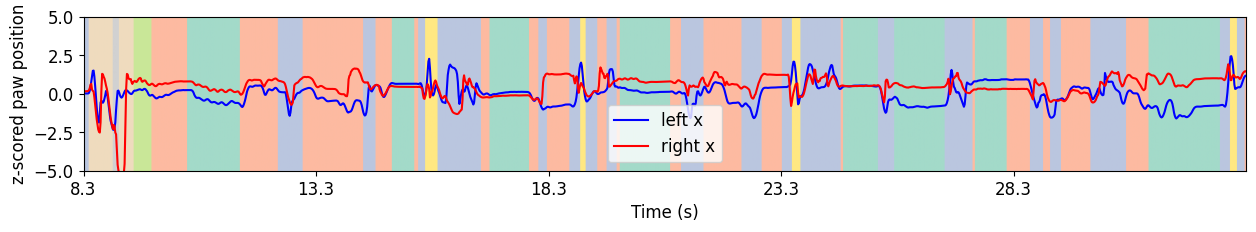

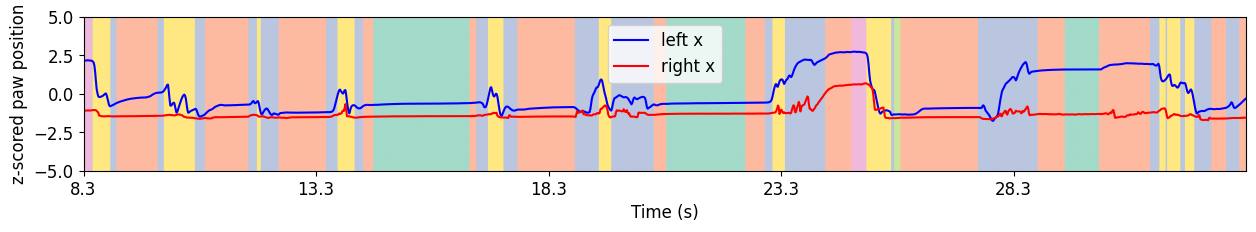

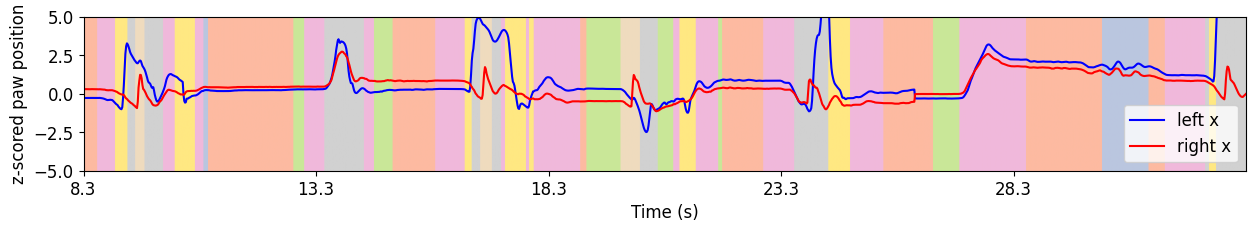

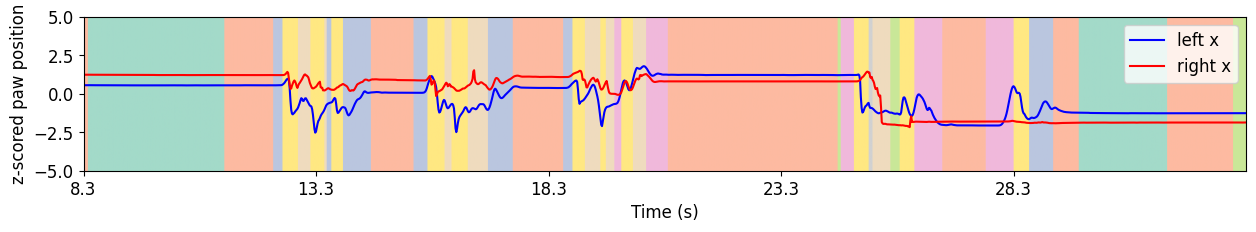

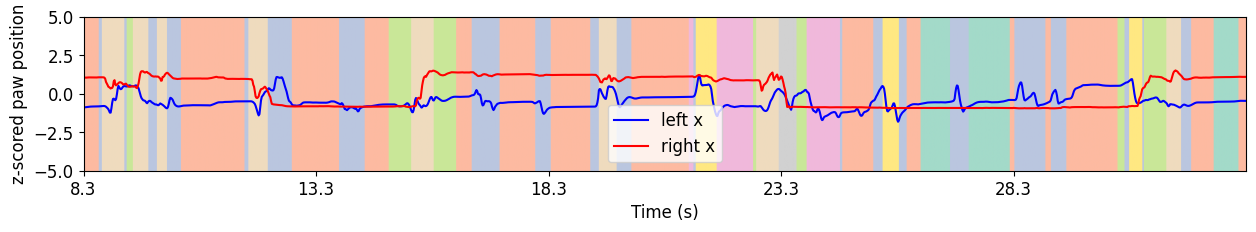

In [ ]:
palette = sns.color_palette('Set2', as_cmap=True)
paw_k = 8

for m, mat in enumerate(all_sessions['session'].unique()[:5]):
    design_matrix = all_sessions.loc[all_sessions['session']==mat][['Bin', 'l_paw_x', 'r_paw_x', 'paw_states']].dropna(axis=0)
    design_matrix['paw_states'] = design_matrix['paw_states'].astype(float)

    fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 2])
    plt.rc('font', size=12)
    init = 500
    ax.plot(zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    ax.plot(zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    attach_array = np.arange(0, paw_k, 1)
    ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],
                extent=(0, len(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette)  # 
    plt.xlim([init, init+1500])
    plt.ylabel('z-scored paw position')
    plt.xlabel('Time (s)')
    plt.ylim([-5, 5])
    inter = 1500
    frame_rate = 60
    plt.xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    plt.legend()
    plt.show()

# LightningAction states

In [ ]:
# new_df['both_paws'] = 0
# new_df.loc[new_df['left_paw']==new_df['right_paw'], 'both_paws'] = 1
# new_df = new_df.loc[new_df['left_paw'].isin(['still', 'move', 'wheel', 'groom'])]
# new_df = new_df.loc[new_df['right_paw'].isin(['still', 'move', 'wheel', 'groom'])]

# new_df['joint'] = new_df['right_paw']+new_df['left_paw']

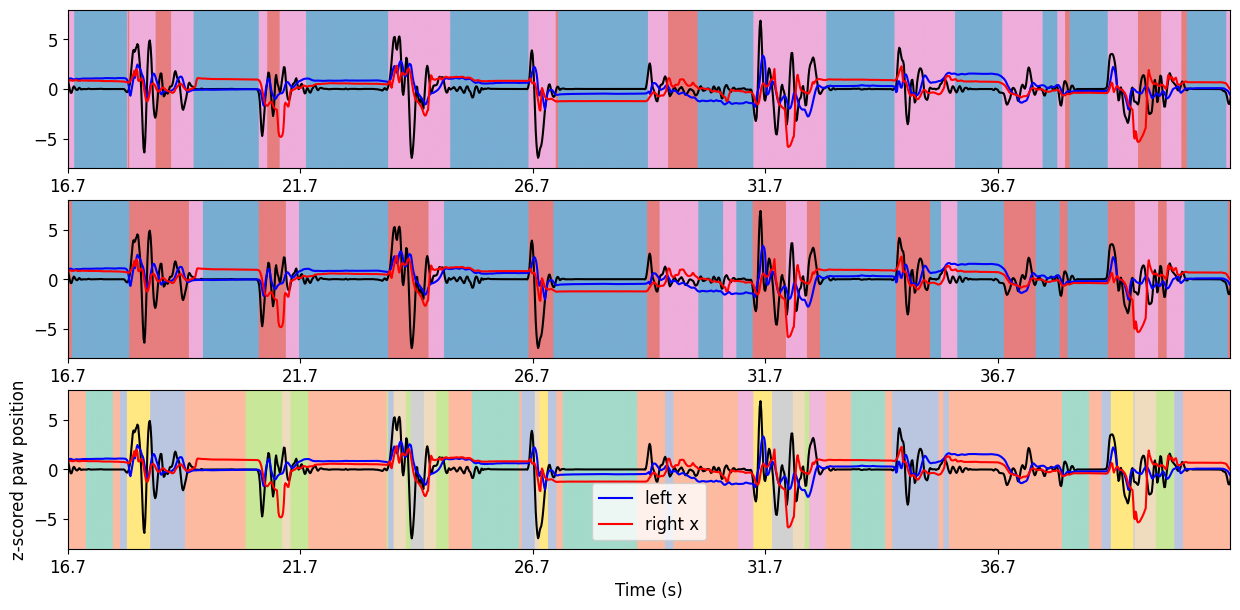

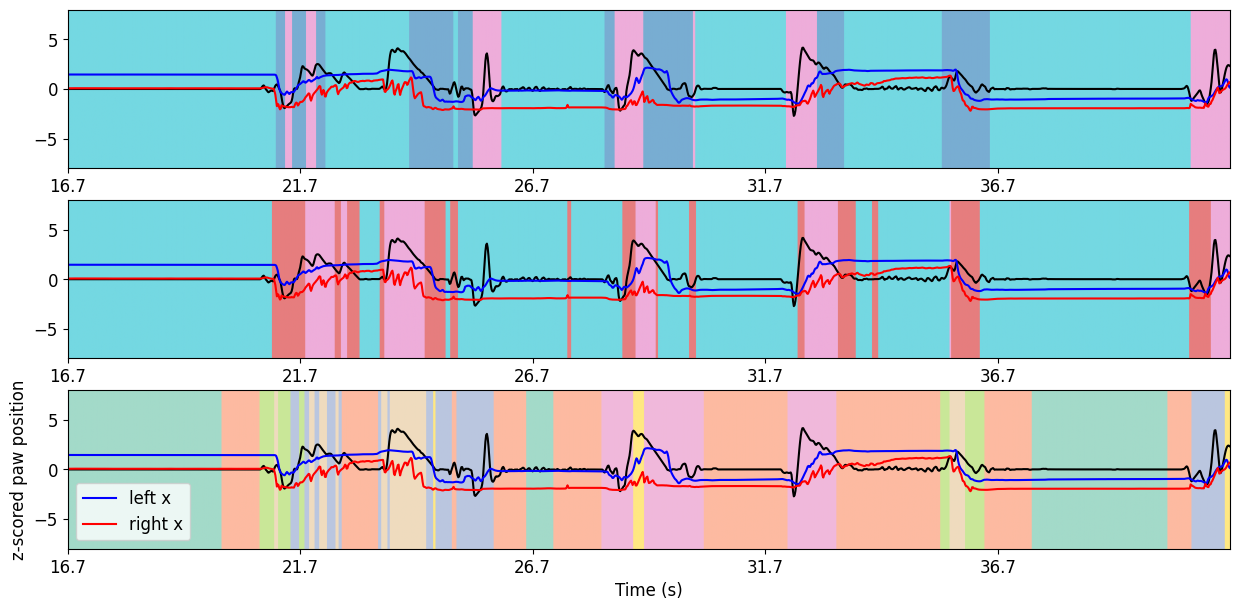

KeyboardInterrupt: 

In [ ]:
palette = sns.color_palette('Set2', n_colors=paw_k, as_cmap=True)

for m, mat in enumerate(new_df['session'].unique()):
    
    use_df = new_df.loc[new_df['session']==mat][['Bin', 'avg_wheel_vel', 'l_paw_x', 'r_paw_x', 'paw_states', 'left_paw', 'right_paw', 'most_likely_action']].dropna(axis=0)

    fig, ax = plt.subplots(ncols=1 , nrows=3, sharex=False, sharey=True, figsize=[15, 7])
    plt.rc('font', size=12)
    init = 1000
    
    use_df['left_paw'] = pd.factorize(use_df['left_paw'])[0]
    ax[0].plot(use_df.loc[use_df['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax[0].plot(zscore(use_df.loc[use_df['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), linestyle='--', color='green', label='left y')
    ax[0].plot(zscore(use_df.loc[use_df['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), linestyle='--',color='red', label='right y')
    attach_array = np.arange(0, len(new_df.left_paw.unique()), 1)
    ax[0].imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],
                extent=(0, len(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap='tab10')
    ax[0].set_xlim([init, init+1500])
    ax[0].set_ylim([-8, 8])
    inter = 1500
    frame_rate = 60
    ax[0].set_xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    
    use_df['right_paw'] = pd.factorize(use_df['right_paw'])[0]
    ax[1].plot(use_df.loc[use_df['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax[1].plot(zscore(use_df.loc[use_df['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), linestyle='--', color='green', label='left y')
    ax[1].plot(zscore(use_df.loc[use_df['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), linestyle='--',color='red', label='right y')
    attach_array = np.arange(0, len(new_df.right_paw.unique()), 1)
    ax[1].imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'right_paw'].reset_index()['right_paw']])[None,:],
                extent=(0, len(np.concatenate([use_df.loc[use_df['Bin']>=init, 'right_paw'].reset_index()['right_paw']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap='tab10')
    ax[1].set_xlim([init, init+1500])
    ax[1].set_ylim([-8, 8])
    ax[1].set_xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))

    use_df['paw_states'] = use_df['paw_states'].astype(float)
    ax[2].plot(use_df.loc[use_df['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax[2].plot(zscore(use_df.loc[use_df['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), linestyle='--', color='green', label='left y')
    ax[2].plot(zscore(use_df.loc[use_df['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), linestyle='--',color='red', label='right y')
    attach_array = np.arange(0, paw_k, 1)
    ax[2].imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],
                extent=(0, len(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette)  # 
    ax[2].set_xlim([init, init+1500])
    ax[2].set_ylabel('z-scored paw position')
    ax[2].set_xlabel('Time (s)')
    ax[2].set_ylim([-8, 8])
    ax[2].set_xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    ax[2].legend()
    plt.show()

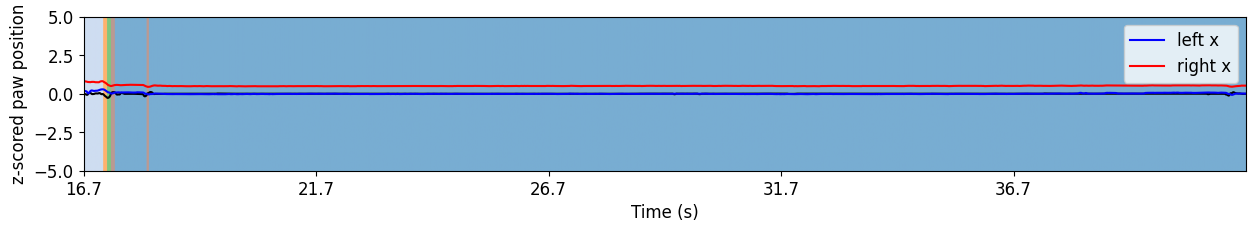

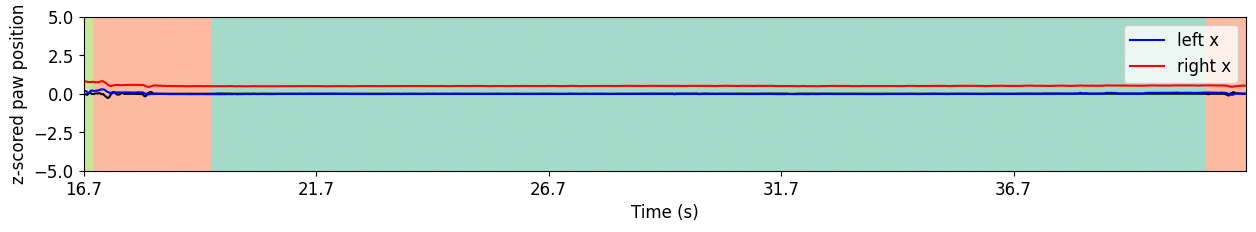

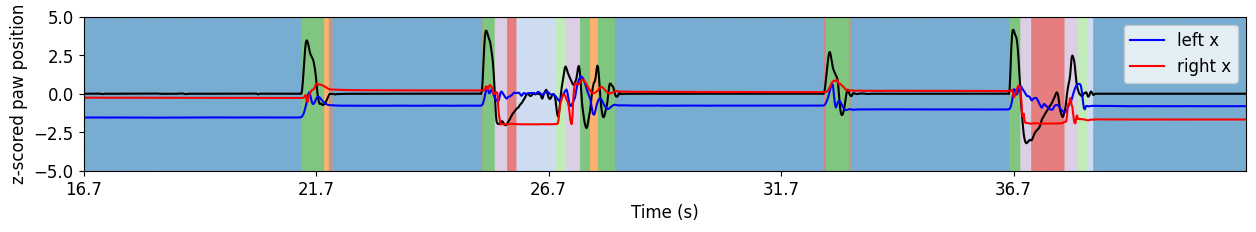

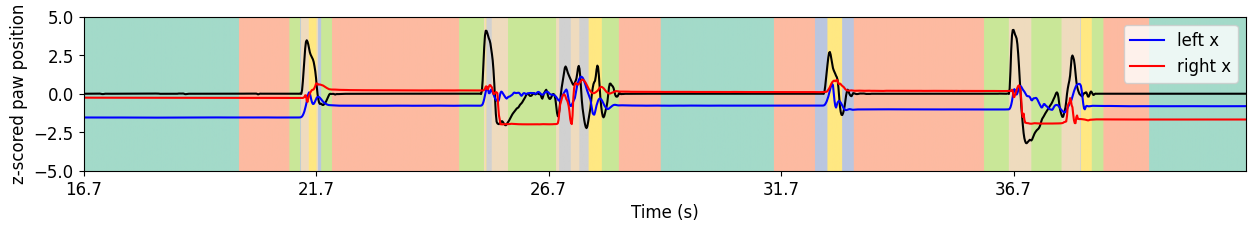

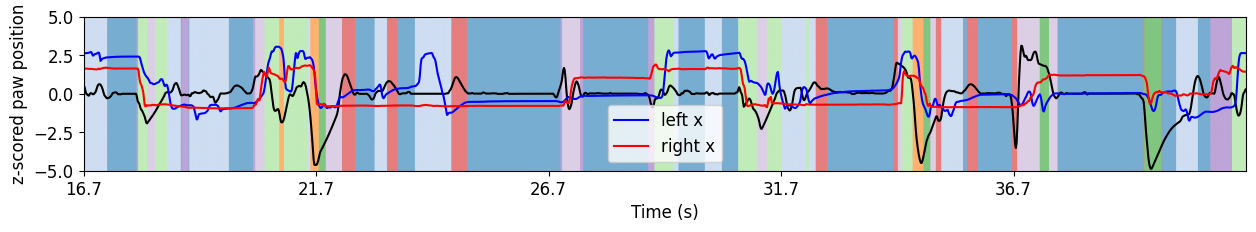

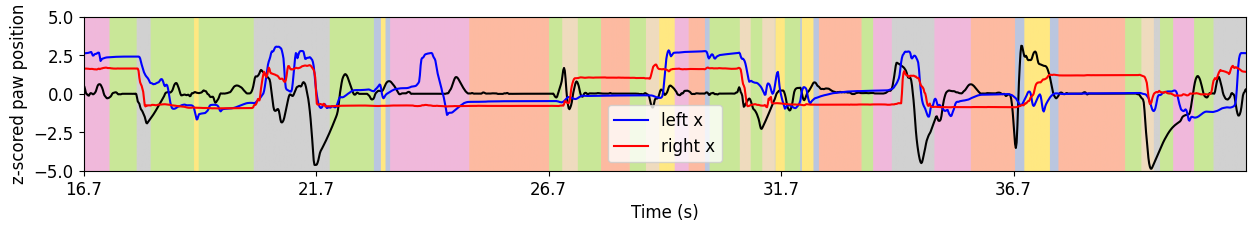

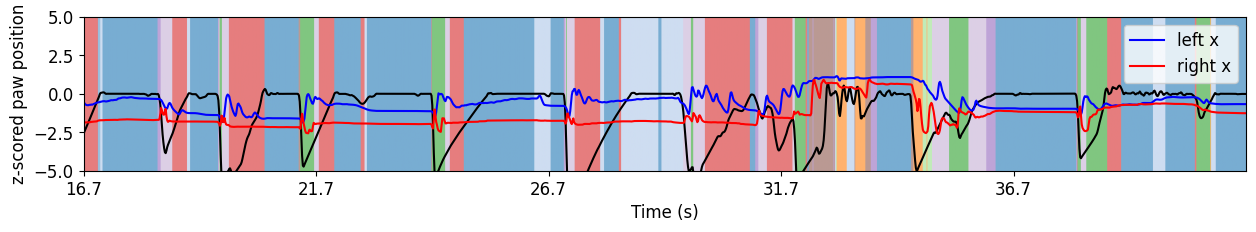

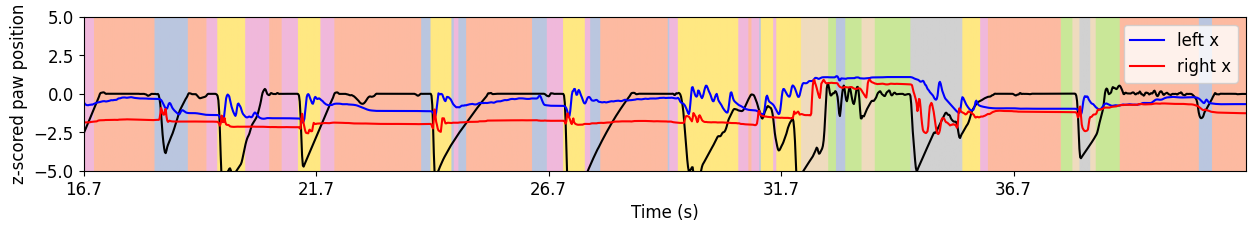

In [ ]:
palette_LA_full = sns.color_palette('tab20', as_cmap=True)
for m, mat in enumerate(new_df['session'].unique()[2:6]):
    use_df = new_df.loc[new_df['session']==mat][['Bin', 'avg_wheel_vel', 'l_paw_x', 'r_paw_x', 
                                                 'paw_states', 'left_paw', 'right_paw', 'most_likely_action', 'identifiable_action']].dropna(axis=0)
    use_df['plot_state'] = use_df['most_likely_action']
    fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 2])
    plt.rc('font', size=12)
    init = 1000
    ax.plot(use_df.loc[use_df['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax.plot(zscore(use_df.loc[use_df['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    ax.plot(zscore(use_df.loc[use_df['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    attach_array = np.arange(0, 16, 1)
    ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'plot_state'].reset_index()['plot_state'], attach_array])[None,:],
                extent=(0, len(np.concatenate([use_df.loc[use_df['Bin']>=init, 'plot_state'].reset_index()['plot_state']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette_LA_full)  # 
    plt.xlim([init, init+1500])
    plt.ylabel('z-scored paw position')
    plt.xlabel('Time (s)')
    plt.ylim([-10, 10])
    inter = 1500
    frame_rate = 60
    plt.xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    plt.legend()
    plt.show()
    
    use_df['plot_state'] = use_df['paw_states'].astype(float)
    fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 2])
    plt.rc('font', size=12)
    init = 1000
    ax.plot(use_df.loc[use_df['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax.plot(zscore(use_df.loc[use_df['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    ax.plot(zscore(use_df.loc[use_df['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    attach_array = np.arange(0, paw_k, 1)
    ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'plot_state'].reset_index()['plot_state'], attach_array])[None,:],
                extent=(0, len(np.concatenate([use_df.loc[use_df['Bin']>=init, 'plot_state'].reset_index()['plot_state']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette)  # 
    plt.xlim([init, init+1500])
    plt.ylabel('z-scored paw position')
    plt.xlabel('Time (s)')
    plt.ylim([-10, 10])
    inter = 1500
    frame_rate = 60
    plt.xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    # plt.xticks([2000, 2200, 2400, 2600, 2800, 3000], np.round(0.017*np.array([2000, 2200, 2400, 2600, 2800, 3000]), 2))
    plt.legend()
    plt.show()

# State statistics

### Unique states use

In [181]:
use_state = 'identifiable_states'
most_likely = 'most_likely_states'


In [186]:
states_oder = ['']*24
counter = 0
for wheel in [0, 1, 2]:
    for paw in range(8):
        key = f"{paw}{wheel}"
        states_oder[counter] = str(key)
        counter += 1

In [ ]:
states_oder = ['stillstill', 'movemove', 'wheelwheel', 'groomgroom', 
               'movewheel', 'wheelmove',
                'stillmove', 'movestill', 'stillwheel', 'wheelstill',
                'groommove', 'movegroom', 
                'groomwheel', 'wheelgroom',
                'groomstill', 'stillgroom']

In [145]:
unique_states = states_df[['mouse_name', 'session', use_state]].drop_duplicates()

In [146]:
unique_states_count = pd.DataFrame(unique_states.groupby([use_state, 'session'])[use_state].count())
unique_states_count = unique_states_count.rename(columns={use_state: "count"}).reset_index()
unique_states_count = pd.DataFrame(unique_states_count.groupby([use_state])['count'].sum()).reset_index()
unique_states_count['ratio'] = unique_states_count['count'] / len(states_df['session'].unique())

In [201]:
base_pal = ListedColormap(sns.color_palette('tab20', 16))
base_pal = ListedColormap(sns.color_palette('Set2', 8))
palette = [base_pal(i) for i in range(base_pal.N)]*3  # Extract colors properly


In [188]:
palette_16 = create_grouped_gradient_palette(n_groups=8, shades_per_group=3, base_palette='Set2')
palette_16_list = [palette_16(i) for i in range(palette_16.N)]  # Extract colors properly
state_to_color = dict(zip(states_oder, palette))
plt.figure(figsize=[12, 4])
plt.rc('font', size=16)
sns.barplot(x=use_state, y='ratio', data=unique_states_count,  order=states_oder, palette=palette) #,
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.ylabel('Fraction sessions with syllable use')
plt.xlabel('Syllables')


ValueError: Could not interpret input 'identifiable_states'

<Figure size 1200x400 with 0 Axes>

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_19960/3338392052.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))


Text(0.5, 0, 'Syllables')

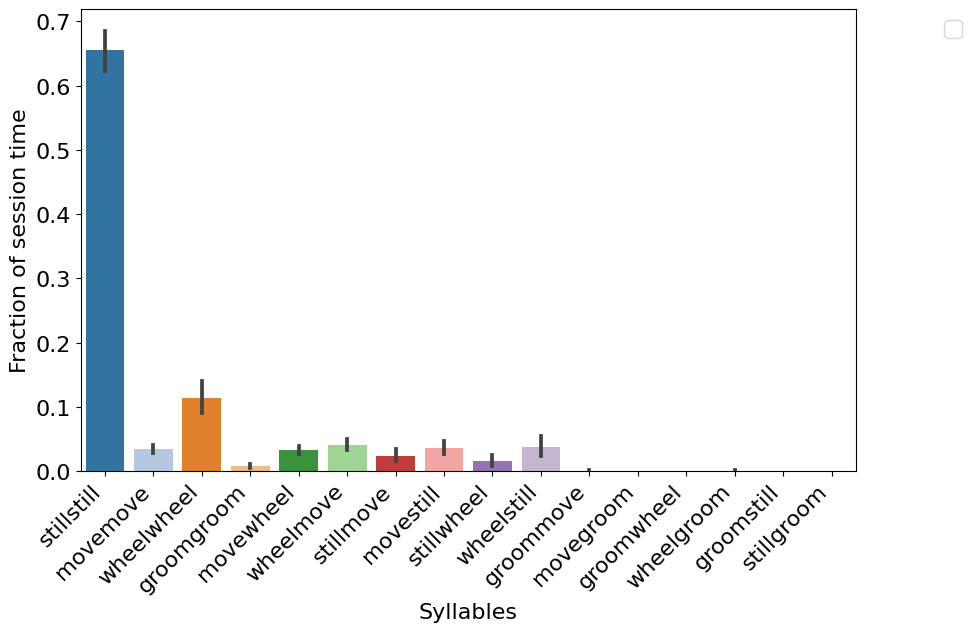

In [163]:
fractions = states_df.groupby(['session'])[use_state].value_counts(normalize=True).rename('fraction').reset_index()

state_to_color = dict(zip(states_oder, palette))
plt.figure(figsize=[10, 6])
plt.rc('font', size=16)

sns.barplot(x=use_state, y='fraction',  data=fractions, order=states_oder, palette=state_to_color)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.ylabel('Fraction of session time')
plt.xlabel('Syllables')

Text(0.5, 0, 'Syllables')

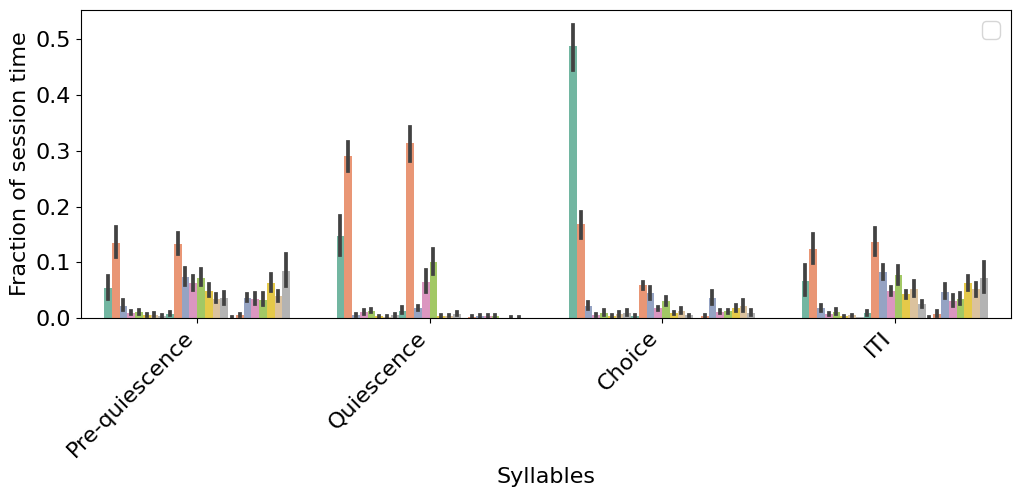

In [99]:
fractions = states_df.groupby(['session', 'broader_label'])['identifiable_states'].value_counts(normalize=True).rename('fraction').reset_index()

state_to_color = dict(zip(states_oder, palette))
plt.figure(figsize=[12, 4])

sns.barplot(hue='identifiable_states', y='fraction', x='broader_label', data=fractions, order=['Pre-quiescence',
                                                                                               'Quiescence', 'Choice', 'ITI'],hue_order=states_oder, palette=state_to_color)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.legend('')
plt.ylabel('Fraction of session time')
plt.xlabel('Syllables')

## State dwell time and transition matrix

In [171]:
identifiable_mapping = {}
counter = 0
for wheel in [0, 1, 2]:
    for paw in range(8):
        key = f"{paw}{wheel}"
        identifiable_mapping[key] = float(counter)
        counter += 1

identifiable_mapping["nan"] = np.nan
inverted_mapping = {v: k for k, v in identifiable_mapping.items()}

In [183]:
sessions = states_df.session.unique()

group_state_freq = pd.DataFrame(columns=['mouse_name', 'session', use_state, 'median_duration', 'mean_duration', 'trans_mat'])
group_trans_mat = pd.DataFrame(columns=['mouse_name', 'session', 'trans_mat'], index=range(len(sessions)))

for m, session in enumerate(sessions):

    session_states = states_df.loc[states_df['session']==session]
    mouse_name = list(session_states['mouse_name'])[0]
    new_states = np.array(session_states[most_likely])
    num_states = len(np.unique(new_states))
    all_identifiable_states = states_oder.copy()
            
    """ State statistics """
    state_freq = pd.DataFrame(columns=['mouse_name', 'session', use_state,
                                        'median_duration', 'mean_duration'], index=range(len(all_identifiable_states))) 
    
    state_freq['mouse_name'] = mouse_name
    state_freq['session'] = session
    state_freq[use_state] = all_identifiable_states

    # State for which we have the durations
    dif = np.diff(new_states)
    jump = np.where(dif != 0)
    jump_dif = np.diff(jump)
    median = np.nanmedian(jump_dif)

    state_names = new_states[jump][1:]
    unique_states = np.array(list(inverted_mapping.keys()))
    unique_states = unique_states[~np.isnan(unique_states)]
    replace_func = np.vectorize(inverted_mapping.get)
    state_label = replace_func(unique_states)

    for s, st in enumerate(unique_states):
        state_durations = jump_dif[0][np.where(state_names==st)]
        state_freq.loc[state_freq[use_state]==state_label[s], 'median_duration'] = np.nanmedian(state_durations)
        state_freq.loc[state_freq[use_state]==state_label[s], 'mean_duration'] = np.nanmean(state_durations)
    
    # sns.barplot(x='identifiable_states', y='median_duration', data=state_freq, order=state_label, palette=state_to_color)
    # plt.xticks(rotation=45, ha='right')
    # plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
    # plt.ylabel('Median dwell time (s)')
    # plt.xlabel('Syllables')
    # plt.show()

    # Save to big df
    if len(group_state_freq) == 0:
        group_state_freq = state_freq.copy()
    else:
        group_state_freq = pd.concat([group_state_freq, state_freq])
                        
    """ State transition matrix (empirical) """
    transition_matrix = transition_probabilities(new_states, unique_states)
    # plt.imshow(transition_matrix)
    # plt.xlabel('Current state')
    # plt.ylabel('Previous state')
    # plt.xticks(np.arange(0, len(all_identifiable_states)), state_label)
    # plt.yticks(np.arange(0, len(all_identifiable_states)), state_label)
    # plt.xticks(rotation=45, ha='right')
    # plt.show()
    group_trans_mat['mouse_name'][m] = mouse_name
    group_trans_mat['session'][m] = session
    # group_trans_mat['trans_mat'][m] = trans_mat_complete(identifiable_mapping, state_label, unique_states, transition_matrix)
    group_trans_mat['trans_mat'][m] = transition_matrix

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_19960/2732863647.py:61: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group_trans_mat['mouse_name'][m] = mouse_name
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_19960/2

In [ ]:
sessions = states_df.session.unique()

group_state_freq = pd.DataFrame(columns=['mouse_name', 'session', use_state, 'median_duration', 'mean_duration', 'trans_mat'])
group_trans_mat = pd.DataFrame(columns=['mouse_name', 'session', 'trans_mat'], index=range(len(sessions)))

for m, session in enumerate(sessions):

    session_states = states_df.loc[states_df['session']==session]
    mouse_name = list(session_states['mouse_name'])[0]
    new_states = np.array(session_states[most_likely])
    num_states = len(np.unique(new_states))
    all_identifiable_states = states_oder.copy()
            
    """ State statistics """
    state_freq = pd.DataFrame(columns=['mouse_name', 'session', use_state,
                                        'median_duration', 'mean_duration'], index=range(len(all_identifiable_states))) 
    
    state_freq['mouse_name'] = mouse_name
    state_freq['session'] = session
    state_freq[use_state] = all_identifiable_states

    # State for which we have the durations
    dif = np.diff(new_states)
    jump = np.where(dif != 0)
    jump_dif = np.diff(jump)
    median = np.nanmedian(jump_dif)

    state_names = new_states[jump][1:]
    unique_states = np.array(list(inverted_mapping.keys()))
    unique_states = unique_states[~np.isnan(unique_states)]
    replace_func = np.vectorize(inverted_mapping.get)
    state_label = replace_func(unique_states)

    for s, st in enumerate(unique_states):
        state_durations = jump_dif[0][np.where(state_names==st)]
        state_freq.loc[state_freq[use_state]==state_label[s], 'median_duration'] = np.nanmedian(state_durations)
        state_freq.loc[state_freq[use_state]==state_label[s], 'mean_duration'] = np.nanmean(state_durations)
    
    # sns.barplot(x='identifiable_states', y='median_duration', data=state_freq, order=state_label, palette=state_to_color)
    # plt.xticks(rotation=45, ha='right')
    # plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
    # plt.ylabel('Median dwell time (s)')
    # plt.xlabel('Syllables')
    # plt.show()

    # Save to big df
    if len(group_state_freq) == 0:
        group_state_freq = state_freq.copy()
    else:
        group_state_freq = pd.concat([group_state_freq, state_freq])
                        
    """ State transition matrix (empirical) """
    transition_matrix = transition_probabilities(new_states, unique_states)
    # plt.imshow(transition_matrix)
    # plt.xlabel('Current state')
    # plt.ylabel('Previous state')
    # plt.xticks(np.arange(0, len(all_identifiable_states)), state_label)
    # plt.yticks(np.arange(0, len(all_identifiable_states)), state_label)
    # plt.xticks(rotation=45, ha='right')
    # plt.show()
    group_trans_mat['mouse_name'][m] = mouse_name
    group_trans_mat['session'][m] = session
    # group_trans_mat['trans_mat'][m] = trans_mat_complete(identifiable_mapping, state_label, unique_states, transition_matrix)
    group_trans_mat['trans_mat'][m] = transition_matrix

In [194]:
group_state_freq['median_duration'] = group_state_freq['median_duration']/60

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_19960/2985121105.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))


Text(0.5, 0, 'Syllables')

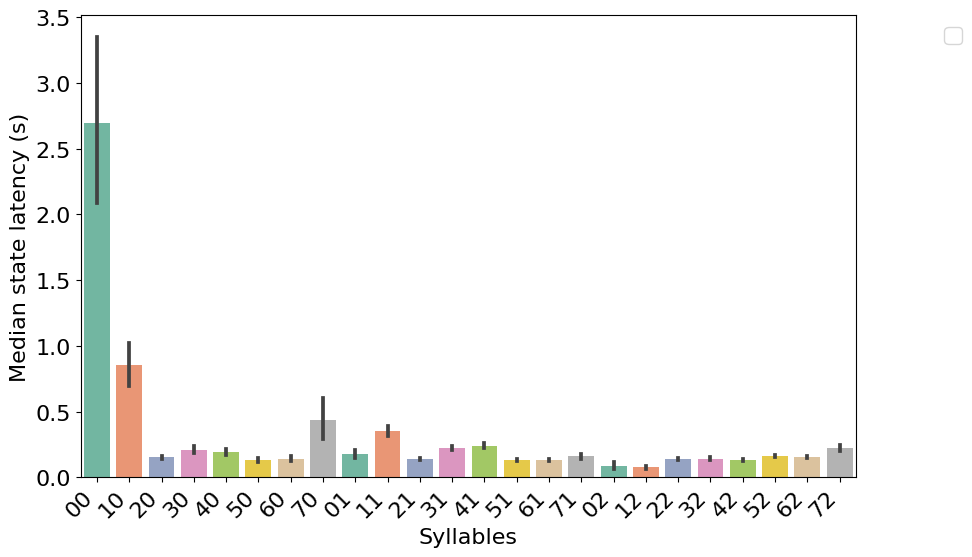

In [202]:
plt.figure(figsize=[10, 6])
plt.rc('font', size=16)

sns.barplot(x= use_state, y='median_duration',  data=group_state_freq, palette=palette) #, order=states_oder)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.ylabel('Median state latency (s)')
plt.xlabel('Syllables')

Text(46.72222222222221, 0.5, 'Current state')

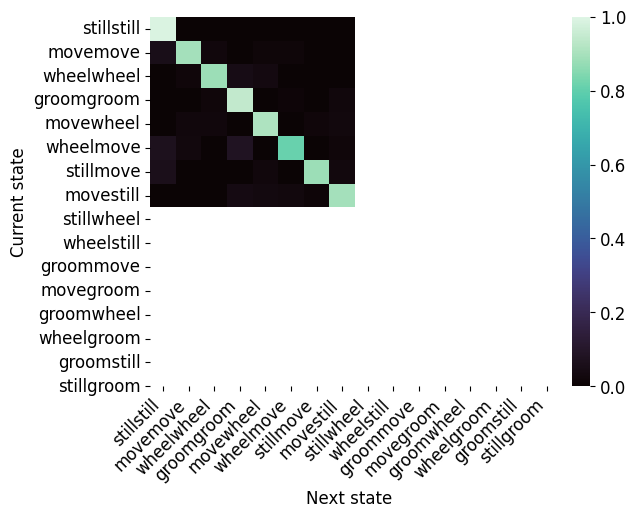

In [167]:
# Results on original model
plt.rc('font', size=12) 
# plt.figure(figsize=[9, 8])
hmap = sns.color_palette("mako", as_cmap=True)
stacked_matrices = np.stack(group_trans_mat['trans_mat'].dropna().values)
nanmean_matrix = np.nanmean(stacked_matrices, axis=0)
sns.heatmap(nanmean_matrix, annot=False, fmt='.1f',
    yticklabels=states_oder, xticklabels=states_oder, 
    cmap= hmap, vmin=0, vmax=1) 
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.xlabel('Next state')
plt.ylabel('Current state')


# Relationship wavelet x lightningAction states

In [25]:
melted = pd.melt(new_df, id_vars=['Bin', 'session', 'paw_states', 'wheel_states', 'both_paws'], value_vars=["left_paw", 'right_paw'])
# melted['value'] = label_func(melted['value'])

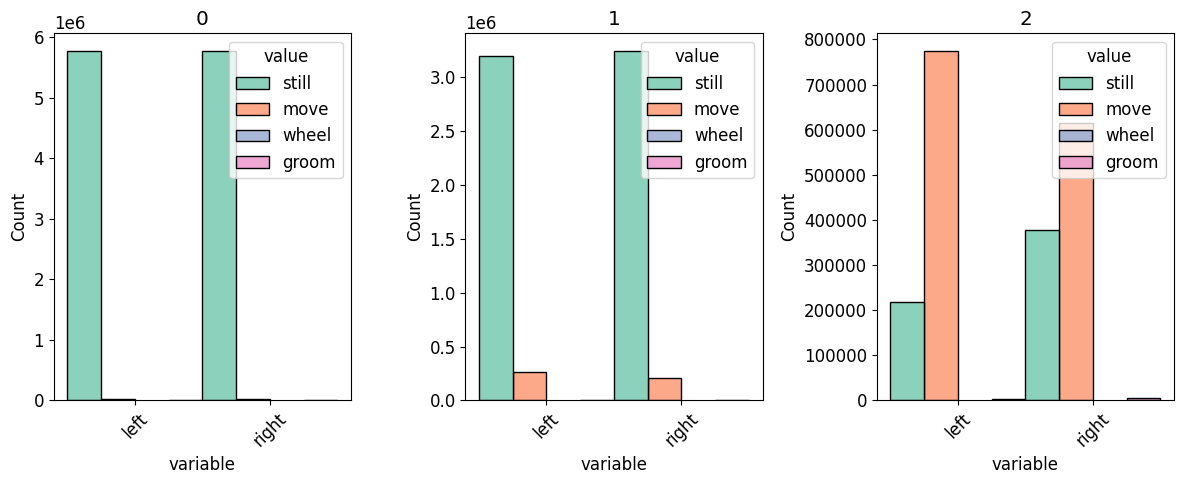

In [27]:
fig, ax = plt.subplots(ncols=3 , nrows=1, sharex=False, sharey=False, figsize=[12, 5])
use_states = 'wheel_states'
for v, var in enumerate(range(3)):
    use_data = melted.loc[melted['paw_states']==v]
    use_data = use_data.loc[use_data['value'].isin(['wheel', 'move', 'groom', 'still'])]

    sns.histplot(x='variable', hue='value', data=use_data, 
                 hue_order=['still', 'move', 'wheel', 'groom'], multiple='dodge', ax=ax[v], palette='Set2')
    ax[v].set_title(v)
    ax[v].set_xticks([0, 1], ['left', 'right'], rotation=45)
    # ax[7].legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

/tmp/ipykernel_88447/1287885044.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[v].legend()
/tmp/ipykernel_88447/1287885044.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[v].legend()
/tmp/ipykernel_88447/1287885044.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[v].legend()
/tmp/ipykernel_88447/1287885044.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[v].legend()
/tmp/ipykernel_88447/1287885044.py:13: UserWarning: No artists with labels found to put in legen

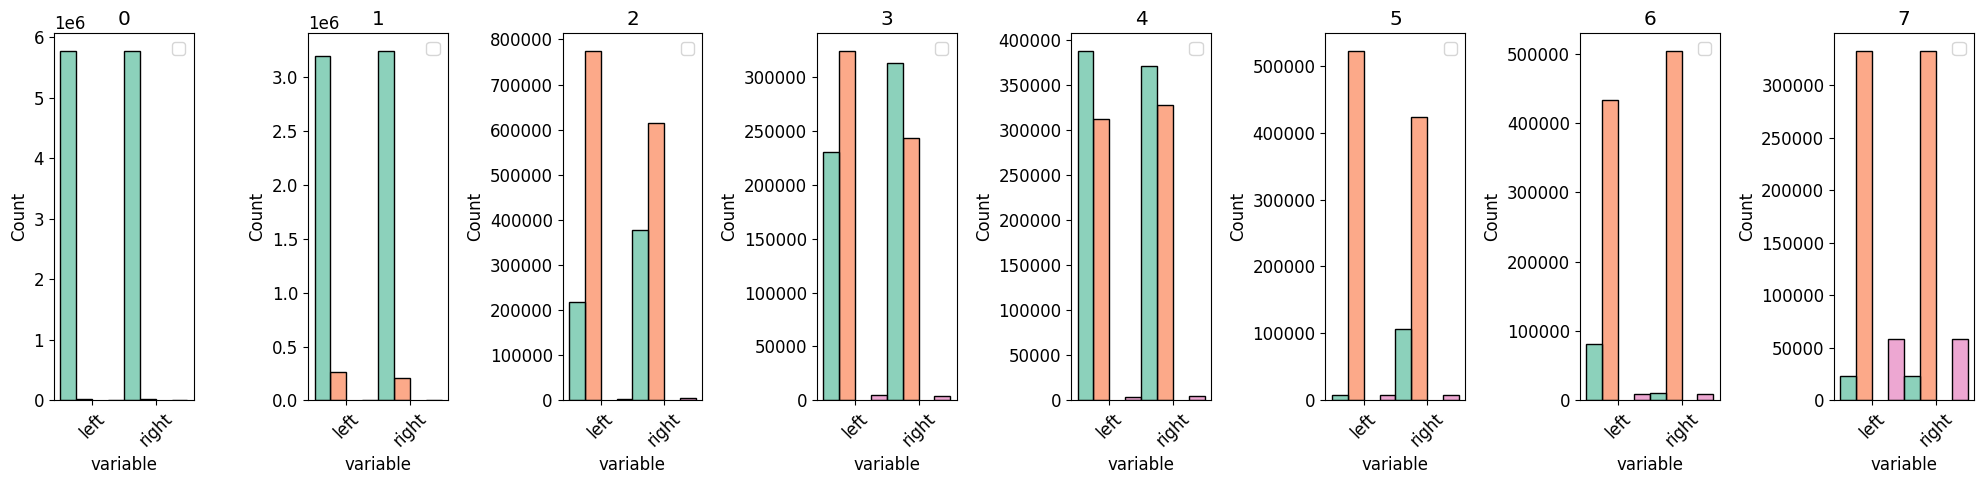

In [29]:
fig, ax = plt.subplots(ncols=8 , nrows=1, sharex=False, sharey=False, figsize=[20, 5])
use_states = 'paw_states'
for v, var in enumerate(range(8)):
    # use_data = melted.loc[(melted['paw_states']==v) & (melted['both_paws']==0)]
    use_data = melted.loc[(melted['paw_states']==v) ]
    use_data = use_data.loc[use_data['value'].isin(['wheel', 'move', 'groom', 'still'])]

    sns.histplot(x='variable', hue='value', data=use_data, 
                 hue_order=['still', 'move', 'wheel', 'groom'], multiple='dodge', ax=ax[v], palette='Set2')
    ax[v].set_title(v)
    ax[v].set_xticks([0, 1], ['left', 'right'], rotation=45)
    # ax[7].legend(bbox_to_anchor=(1.1, 1.05))
    ax[v].legend()
plt.tight_layout()

In [30]:
new_df["paw_ratio"] = (new_df.groupby(['session', 'left_paw', 'right_paw'])['paw_states'].transform(lambda x: x / x.sum() if x.sum()>0 else 0))
new_df['joint'] = new_df['left_paw']+new_df['right_paw']

In [31]:
data = (
    new_df
    .groupby(['left_paw', 'right_paw', 'paw_states']) # 'session', 
    .size()
    .reset_index(name='count'))
data['usage'] = (
    data['count'] /
    data.groupby(['left_paw', 'right_paw'])['count'].transform('sum'))

data['joint'] = data['left_paw']+data['right_paw']

In [32]:
data = data.loc[data['left_paw'].isin(['still', 'move', 'wheel', 'groom'])]
data = data.loc[data['right_paw'].isin(['still', 'move', 'wheel', 'groom'])]

In [33]:
hue_order = ['stillstill', 'movemove', 'wheelwheel', 'groomgroom', 
 'stillmove', 'movestill', 'stillwheel', 'wheelstill',
 'groomstill', 'stillgroom', 
  'groommove', 'movegroom', 
 'groomwheel', 'wheelgroom', 'movewheel', 'wheelmove']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'stillstill'),
  Text(1, 0, 'movemove'),
  Text(2, 0, 'wheelwheel'),
  Text(3, 0, 'groomgroom'),
  Text(4, 0, 'stillmove'),
  Text(5, 0, 'movestill'),
  Text(6, 0, 'stillwheel'),
  Text(7, 0, 'wheelstill'),
  Text(8, 0, 'groomstill'),
  Text(9, 0, 'stillgroom'),
  Text(10, 0, 'groommove'),
  Text(11, 0, 'movegroom'),
  Text(12, 0, 'groomwheel'),
  Text(13, 0, 'wheelgroom'),
  Text(14, 0, 'movewheel'),
  Text(15, 0, 'wheelmove')])

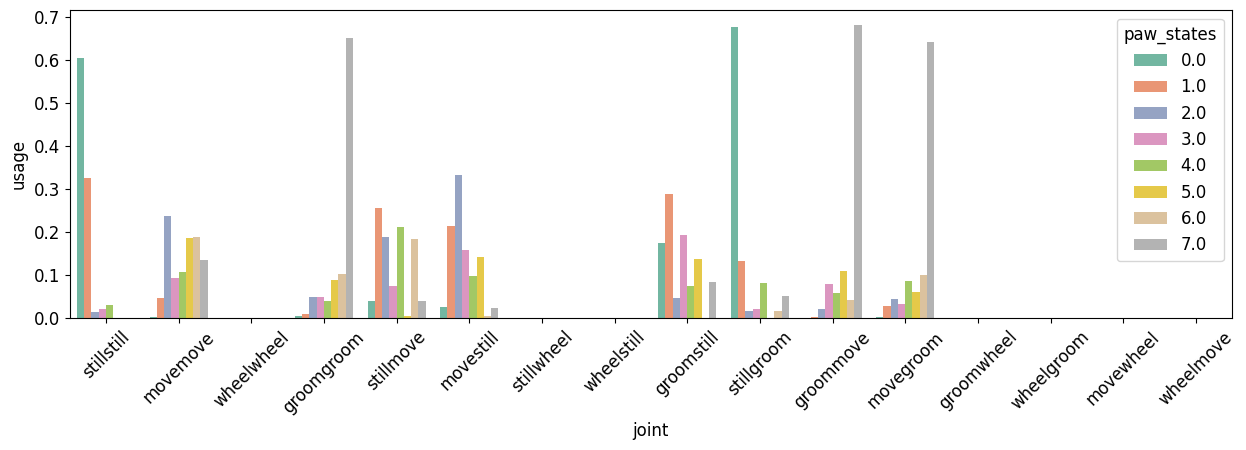

In [34]:
fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 4])
sns.barplot(x='joint', hue='paw_states', y='usage', 
            order=hue_order, data=data, palette='Set2')
plt.xticks(rotation=45)

/tmp/ipykernel_88447/4060295686.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[v].legend()
/tmp/ipykernel_88447/4060295686.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[v].legend()
/tmp/ipykernel_88447/4060295686.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[v].legend()
/tmp/ipykernel_88447/4060295686.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[v].legend()
/tmp/ipykernel_88447/4060295686.py:12: UserWarning: No artists with labels found to put in legen

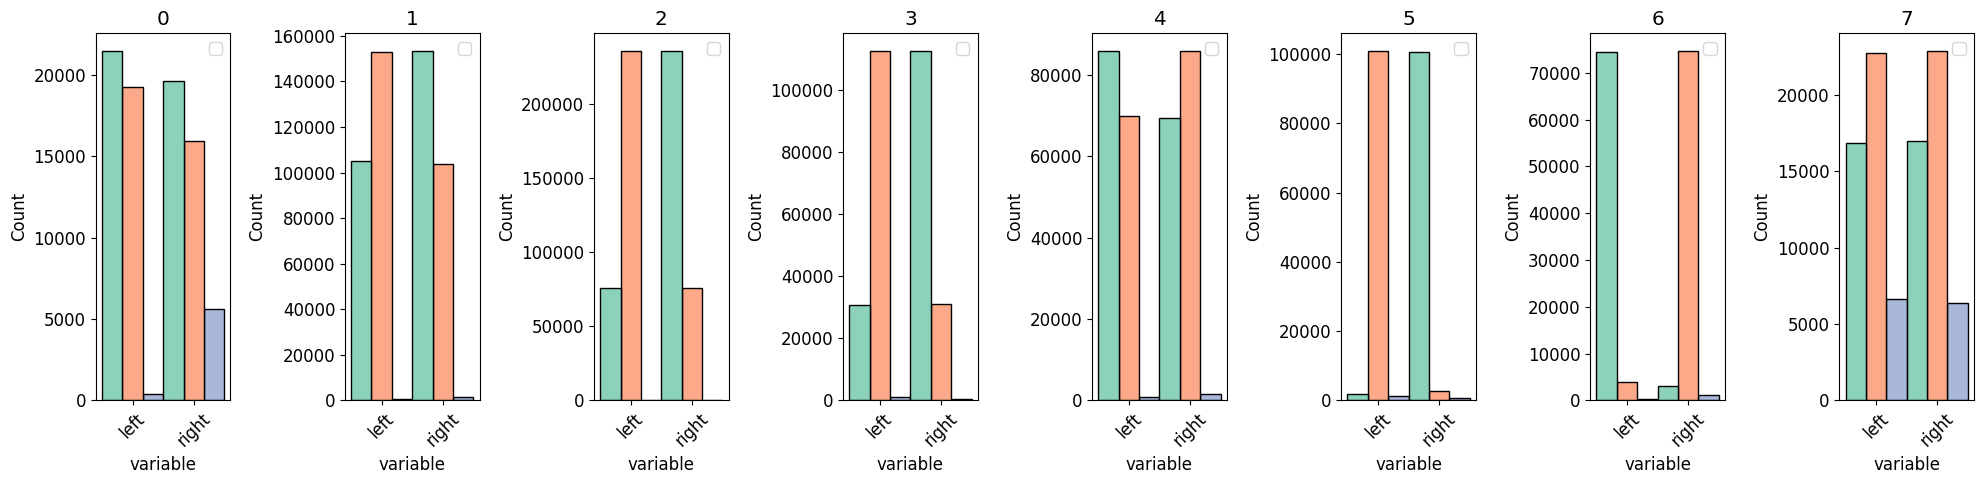

In [39]:
fig, ax = plt.subplots(ncols=8 , nrows=1, sharex=False, sharey=False, figsize=[20, 5])
use_states = 'paw_states'
for v, var in enumerate(range(8)):
    use_data = melted.loc[(melted['paw_states']==v) & (melted['both_paws']==0)]
    use_data = use_data.loc[use_data['value'].isin(['move', 'groom', 'still'])] # 'wheel', 

    sns.histplot(x='variable', hue='value', data=use_data, multiple='dodge',
                 hue_order=['still', 'move', 'groom'], ax=ax[v], palette='Set2')
    ax[v].set_title(v)
    ax[v].set_xticks([0, 1], ['left', 'right'], rotation=45)
    # ax[7].legend(bbox_to_anchor=(1.1, 1.05))
    ax[v].legend()
plt.tight_layout()

/tmp/ipykernel_88447/2789046501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_right[v], data=grouped_right, ax=ax[w, 1], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:16: FutureWarning: 

Pas

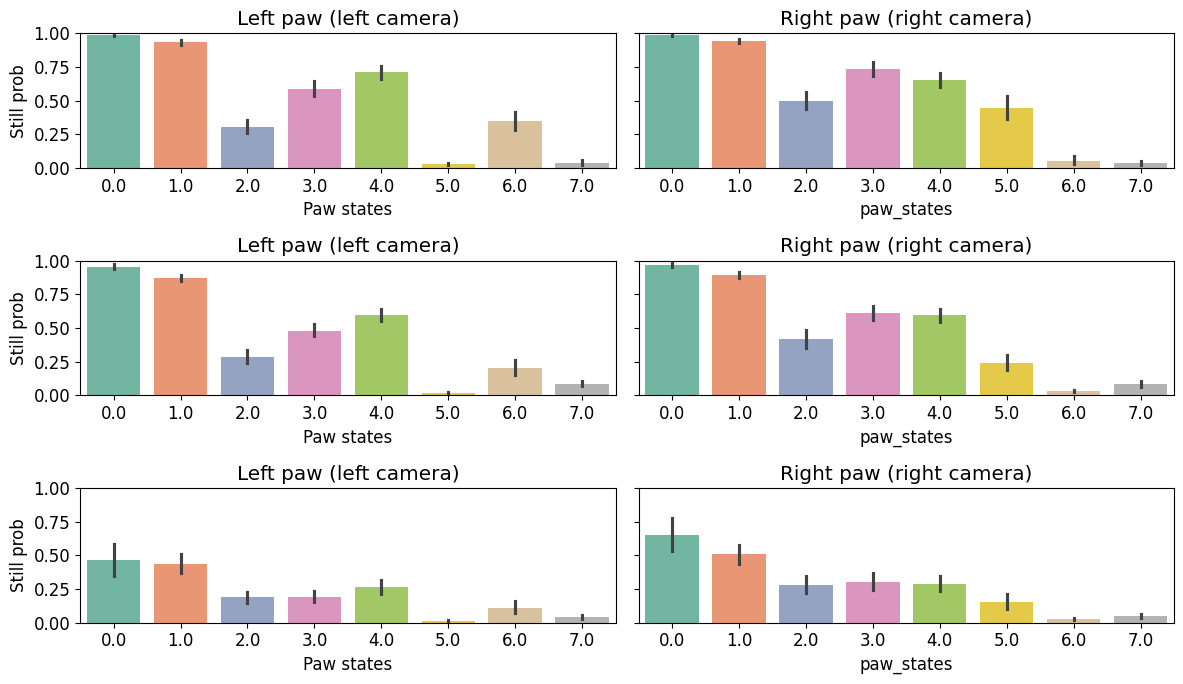

/tmp/ipykernel_88447/2789046501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_right[v], data=grouped_right, ax=ax[w, 1], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:16: FutureWarning: 

Pas

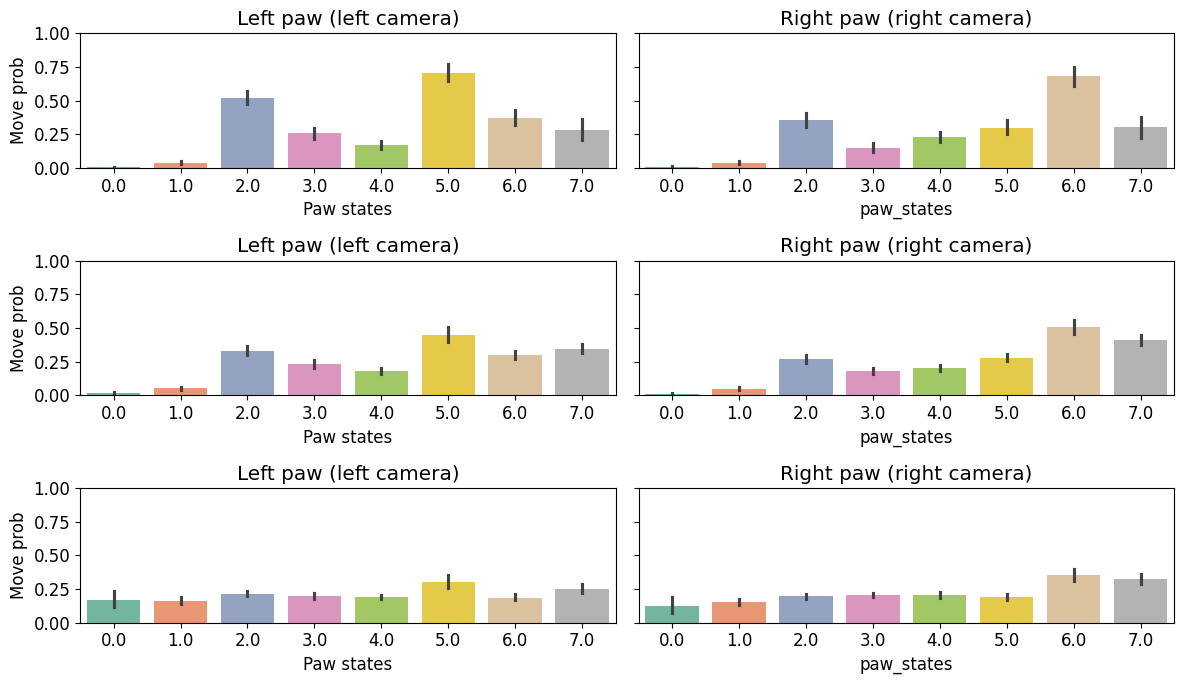

/tmp/ipykernel_88447/2789046501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_right[v], data=grouped_right, ax=ax[w, 1], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:16: FutureWarning: 

Pas

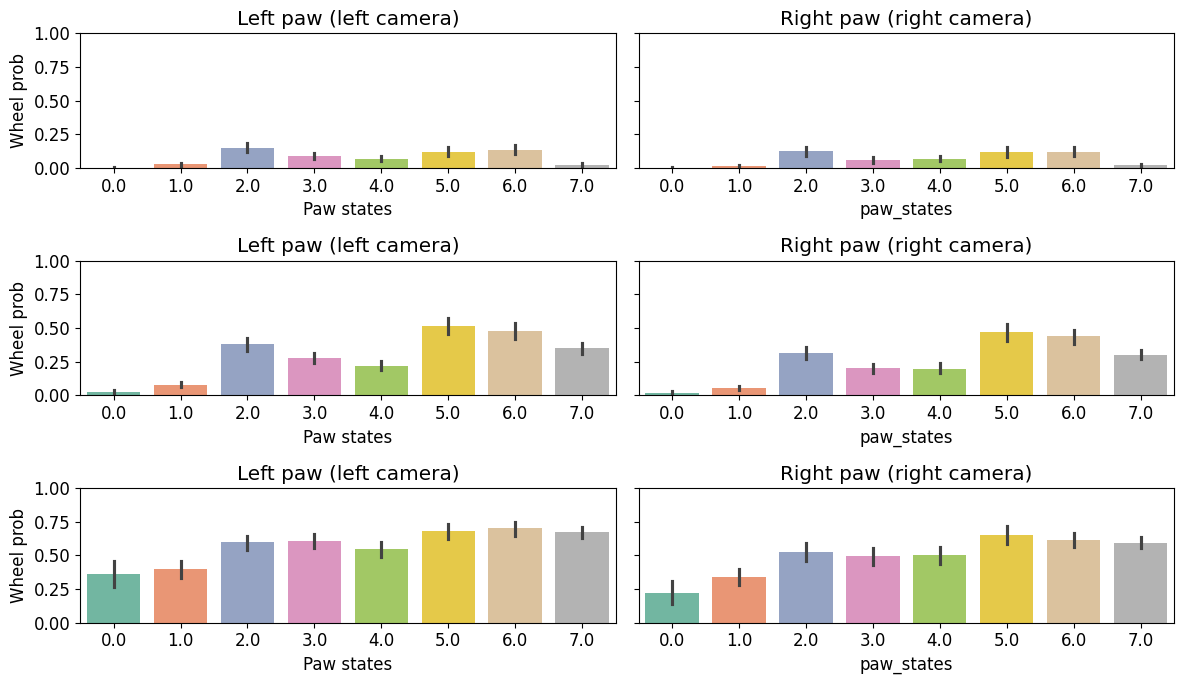

/tmp/ipykernel_88447/2789046501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_right[v], data=grouped_right, ax=ax[w, 1], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
/tmp/ipykernel_88447/2789046501.py:16: FutureWarning: 

Pas

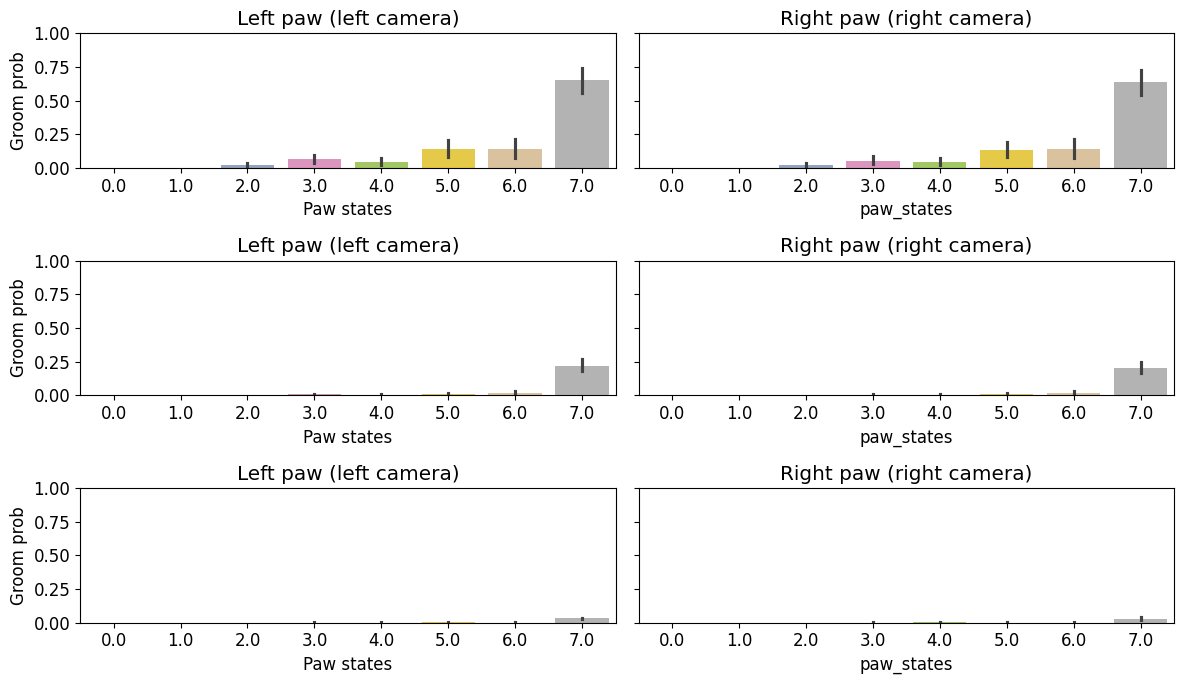

In [57]:
var_left = ['leftCam_paw_r_still',  'leftCam_paw_r_move',  'leftCam_paw_r_wheel_turn',  'leftCam_paw_r_groom']
var_right = ['rightCam_paw_r_still',  'rightCam_paw_r_move',  'rightCam_paw_r_wheel_turn',  'rightCam_paw_r_groom']
titles = ['Left paw (left camera)', 'Right paw (right camera)']
state_labels = ['Still', 'Move', 'Wheel', 'Groom']
for v, var in enumerate(range(len(var_left))):
    fig, ax = plt.subplots(ncols=2 , nrows=3, sharex=False, sharey=True, figsize=[12, 7])

    for w, wheel in enumerate([0, 1, 2]):
        use_data = all_sessions.loc[all_sessions['wheel_states']==wheel]
        use_states = 'paw_states'

        grouped_left = use_data.groupby(['session', use_states])[var_left[v]].mean().reset_index()
        grouped_right = use_data.groupby(['session', use_states])[var_right[v]].mean().reset_index()

        sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[w, 0], palette='Set2')
        sns.barplot(x=use_states, y=var_right[v], data=grouped_right, ax=ax[w, 1], palette='Set2')
        ax[w, 0].set_title(titles[0])
        ax[w, 1].set_title(titles[1])
        ax[w, 0].set_xlabel('Paw states')
        ax[w, 0].set_ylabel(state_labels[v]+str(' prob'))
        ax[w, 0].set_ylim([0, 1])
    plt.tight_layout()
    plt.show()

In [ ]:
var_left = ['leftCam_paw_r_still',  'leftCam_paw_r_move',  'leftCam_paw_r_wheel_turn',  'leftCam_paw_r_groom']
var_right = ['rightCam_paw_r_still',  'rightCam_paw_r_move',  'rightCam_paw_r_wheel_turn',  'rightCam_paw_r_groom']
titles = ['Left paw (left camera)', 'Right paw (right camera)']
for v, var in enumerate(range(len(var_left))):
    fig, ax = plt.subplots(ncols=2 , nrows=1, sharex=False, sharey=False, figsize=[10, 5])

    sns.barplot(x='paw_states', y=var_left[v], data=all_sessions, ax=ax[0])
    sns.barplot(x='paw_states', y=var_right[v], data=all_sessions, ax=ax[1])
    ax[0].set_title(titles[0])
    ax[1].set_title(titles[1])
    plt.show()